<h1>Poynting flux evolution in Active  Regions</h1>

In this notebook...

In [2]:
# Importing the packages.
import numpy as np
import pandas as pd

import sunpy
import sunpy.map

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Polygon
import seaborn as sns

# Setting seaborn style.
sns.set()
sns.set_context('poster')

In [3]:
# Loading the dataset into a DataFrame.
df_pa = pd.read_csv('NAN2019DATA.csv',sep=',', index_col=0, parse_dates=True, infer_datetime_format=True)

# Printing the first 5 columns.
df_pa.head()

,Pix_a_a,Pix_a_o,Pix_b_a,Pix_b_o,Sn_active_and,Sn_active_or,Sn_blob_and,Sn_blob_or,Sn_unfiltered,St_active_and,...,harp_area_si,LL,area,hale,longitude,mcintosh1,mcintosh2,mcintosh3,hale_enc,area_si
2014-12-31,20714.898305,24171.898305,105497.593220,106123.508475,4.808720e+19,5.098905e+19,8.306460e+19,8.309048e+19,8.427968e+19,3.656814e+20,...,5.175486e+16,7,50,Beta,-63,D,a,i,1,1.521850e+17
2015-01-01,29271.091667,33967.425000,142139.433333,142709.150000,1.068437e+20,1.205545e+20,2.135640e+20,2.135708e+20,2.143257e+20,3.833080e+20,...,5.175486e+16,11,270,Beta-Gamma,-48,E,a,c,3,8.217990e+17
2015-01-02,35123.850000,40217.308333,175993.608333,176539.100000,1.894150e+20,2.099631e+20,3.859609e+20,3.859708e+20,3.864428e+20,1.603956e+20,...,5.175486e+16,11,460,Beta-Gamma,-35,E,k,c,3,1.400102e+18
2015-01-03,38140.300000,44480.116667,202637.275000,203141.208333,2.553423e+20,2.862769e+20,4.928761e+20,4.928772e+20,4.930309e+20,7.236948e+19,...,5.175486e+16,12,770,Beta-Gamma-Delta,-22,E,k,c,4,2.343649e+18
2015-01-04,39349.816667,46044.650000,220703.258333,221156.950000,2.518223e+20,2.823658e+20,4.783142e+20,4.783161e+20,4.786319e+20,-2.379646e+19,...,5.175486e+16,15,900,Beta-Gamma-Delta,-9,E,k,c,4,2.739330e+18


In [4]:
# Displaying the columns that we have on the dataset.
df_pa.columns

Index(['Pix_a_a', 'Pix_a_o', 'Pix_b_a', 'Pix_b_o', 'Sn_active_and',
       'Sn_active_or', 'Sn_blob_and', 'Sn_blob_or', 'Sn_unfiltered',
       'St_active_and', 'St_active_or', 'St_blob_and', 'St_blob_or',
       'St_unfiltered', 'Pix_a_a_si', 'Pix_a_o_si', 'Pix_b_a_si', 'Pix_b_o_si',
       'Sn_active_and_pa', 'Sn_active_or_pa', 'Sn_blob_and_pa',
       'Sn_blob_or_pa', 'St_active_and_pa', 'St_active_or_pa',
       'St_blob_and_pa', 'St_blob_or_pa', 'harp_area_si', 'LL', 'area', 'hale',
       'longitude', 'mcintosh1', 'mcintosh2', 'mcintosh3', 'hale_enc',
       'area_si'],
      dtype='object')

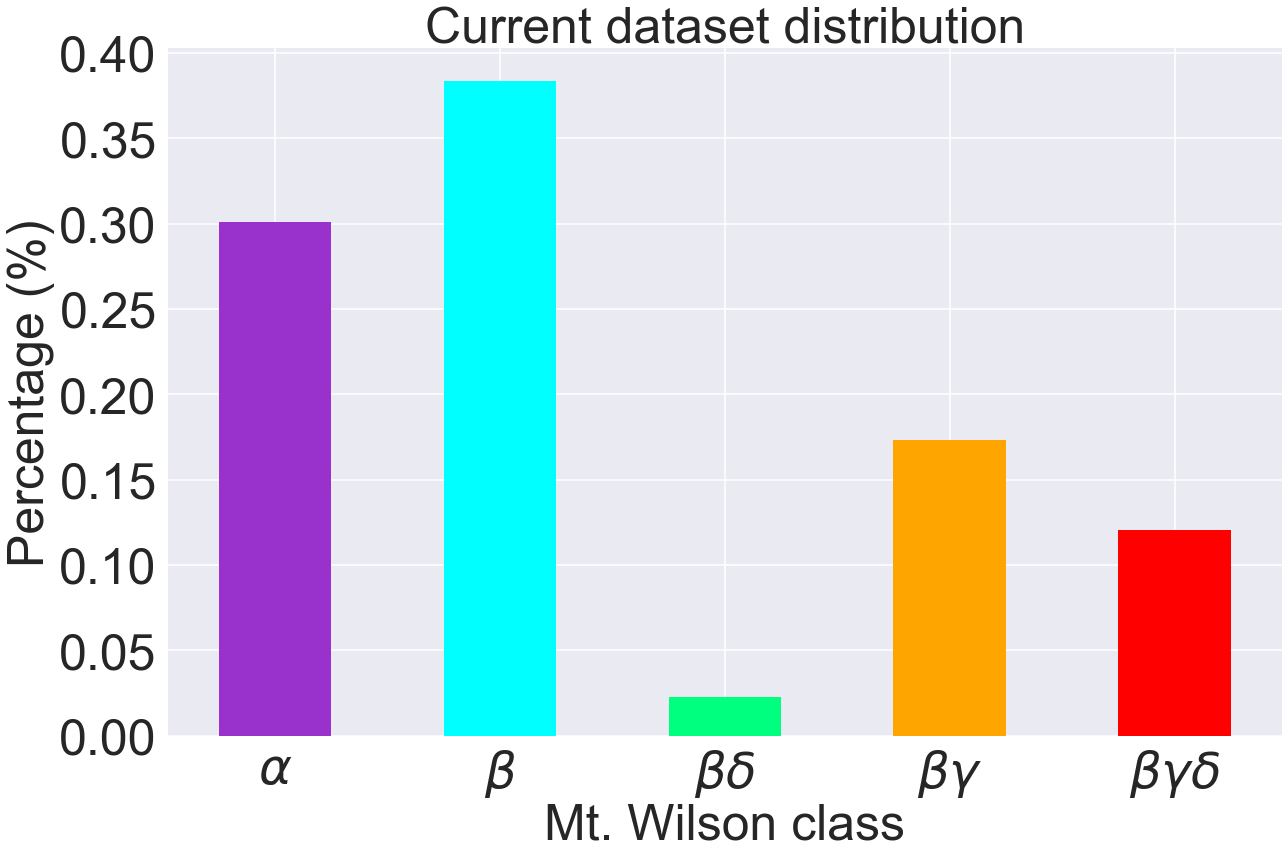

In [6]:
fig,ax = plt.subplots(1, figsize=(18,12))
N, bins, patches = ax.hist(df_pa['hale_enc'], bins=np.arange(6)-0.5, rwidth=.5, density=True)
patches[0].set_facecolor('darkorchid')
patches[1].set_facecolor('cyan')
patches[2].set_facecolor('springgreen')
patches[3].set_facecolor('orange')
patches[4].set_facecolor('red')
plt.title('Current dataset distribution')
plt.xlabel('Mt. Wilson class')
plt.ylabel(r'Percentage (%)')
plt.xticks(np.arange(5), (r'$\alpha$', r'$\beta$', r'$\beta\delta$', r'$\beta\gamma$', r'$\beta\gamma\delta$'))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(50)
plt.tight_layout()
plt.show()

In [7]:
# Creating the color map based on the Hale class.
cmaped = df_pa['hale_enc']
vmin = df_pa['hale_enc'].min()
vmax = df_pa['hale_enc'].max()
cmap = cm.get_cmap('rainbow')

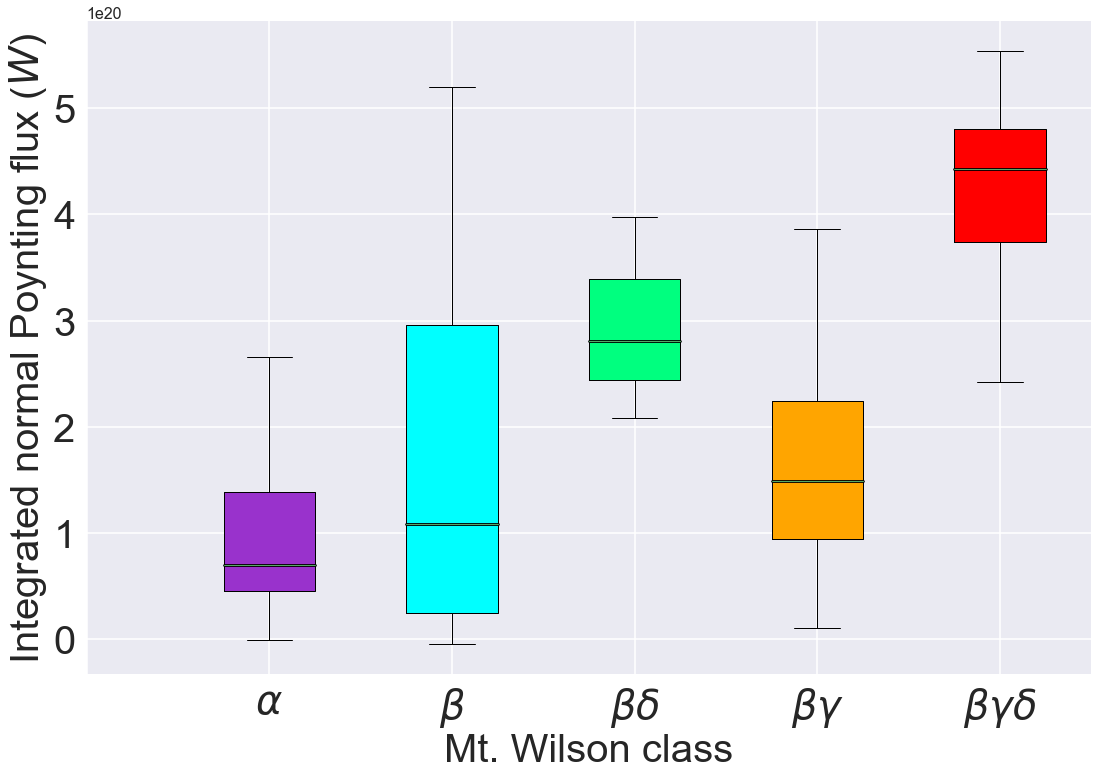

In [9]:
fig,ax1 = plt.subplots(1, figsize=(18,12))

bp = ax1.boxplot([df_pa['Sn_unfiltered'].loc[df_pa['hale_enc'] == i].values for i in range(5)], notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

box_colors = ['darkorchid', 'cyan', 'springgreen', 'orange', 'red']
num_boxes = len([df_pa['Sn_unfiltered'].loc[df_pa['hale_enc'] == i].values for i in range(5)])
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i]))
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    
plt.xlabel('Mt. Wilson class')
plt.ylabel('Integrated normal Poynting flux ($W$)')
plt.xticks(np.arange(6), ('',r'$\alpha$', r'$\beta$', r'$\beta\delta$', r'$\beta\gamma$', r'$\beta\gamma\delta$'))

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(40)

plt.savefig('/Users/andrechicrala/Downloads/whisn.eps')
    
plt.show()

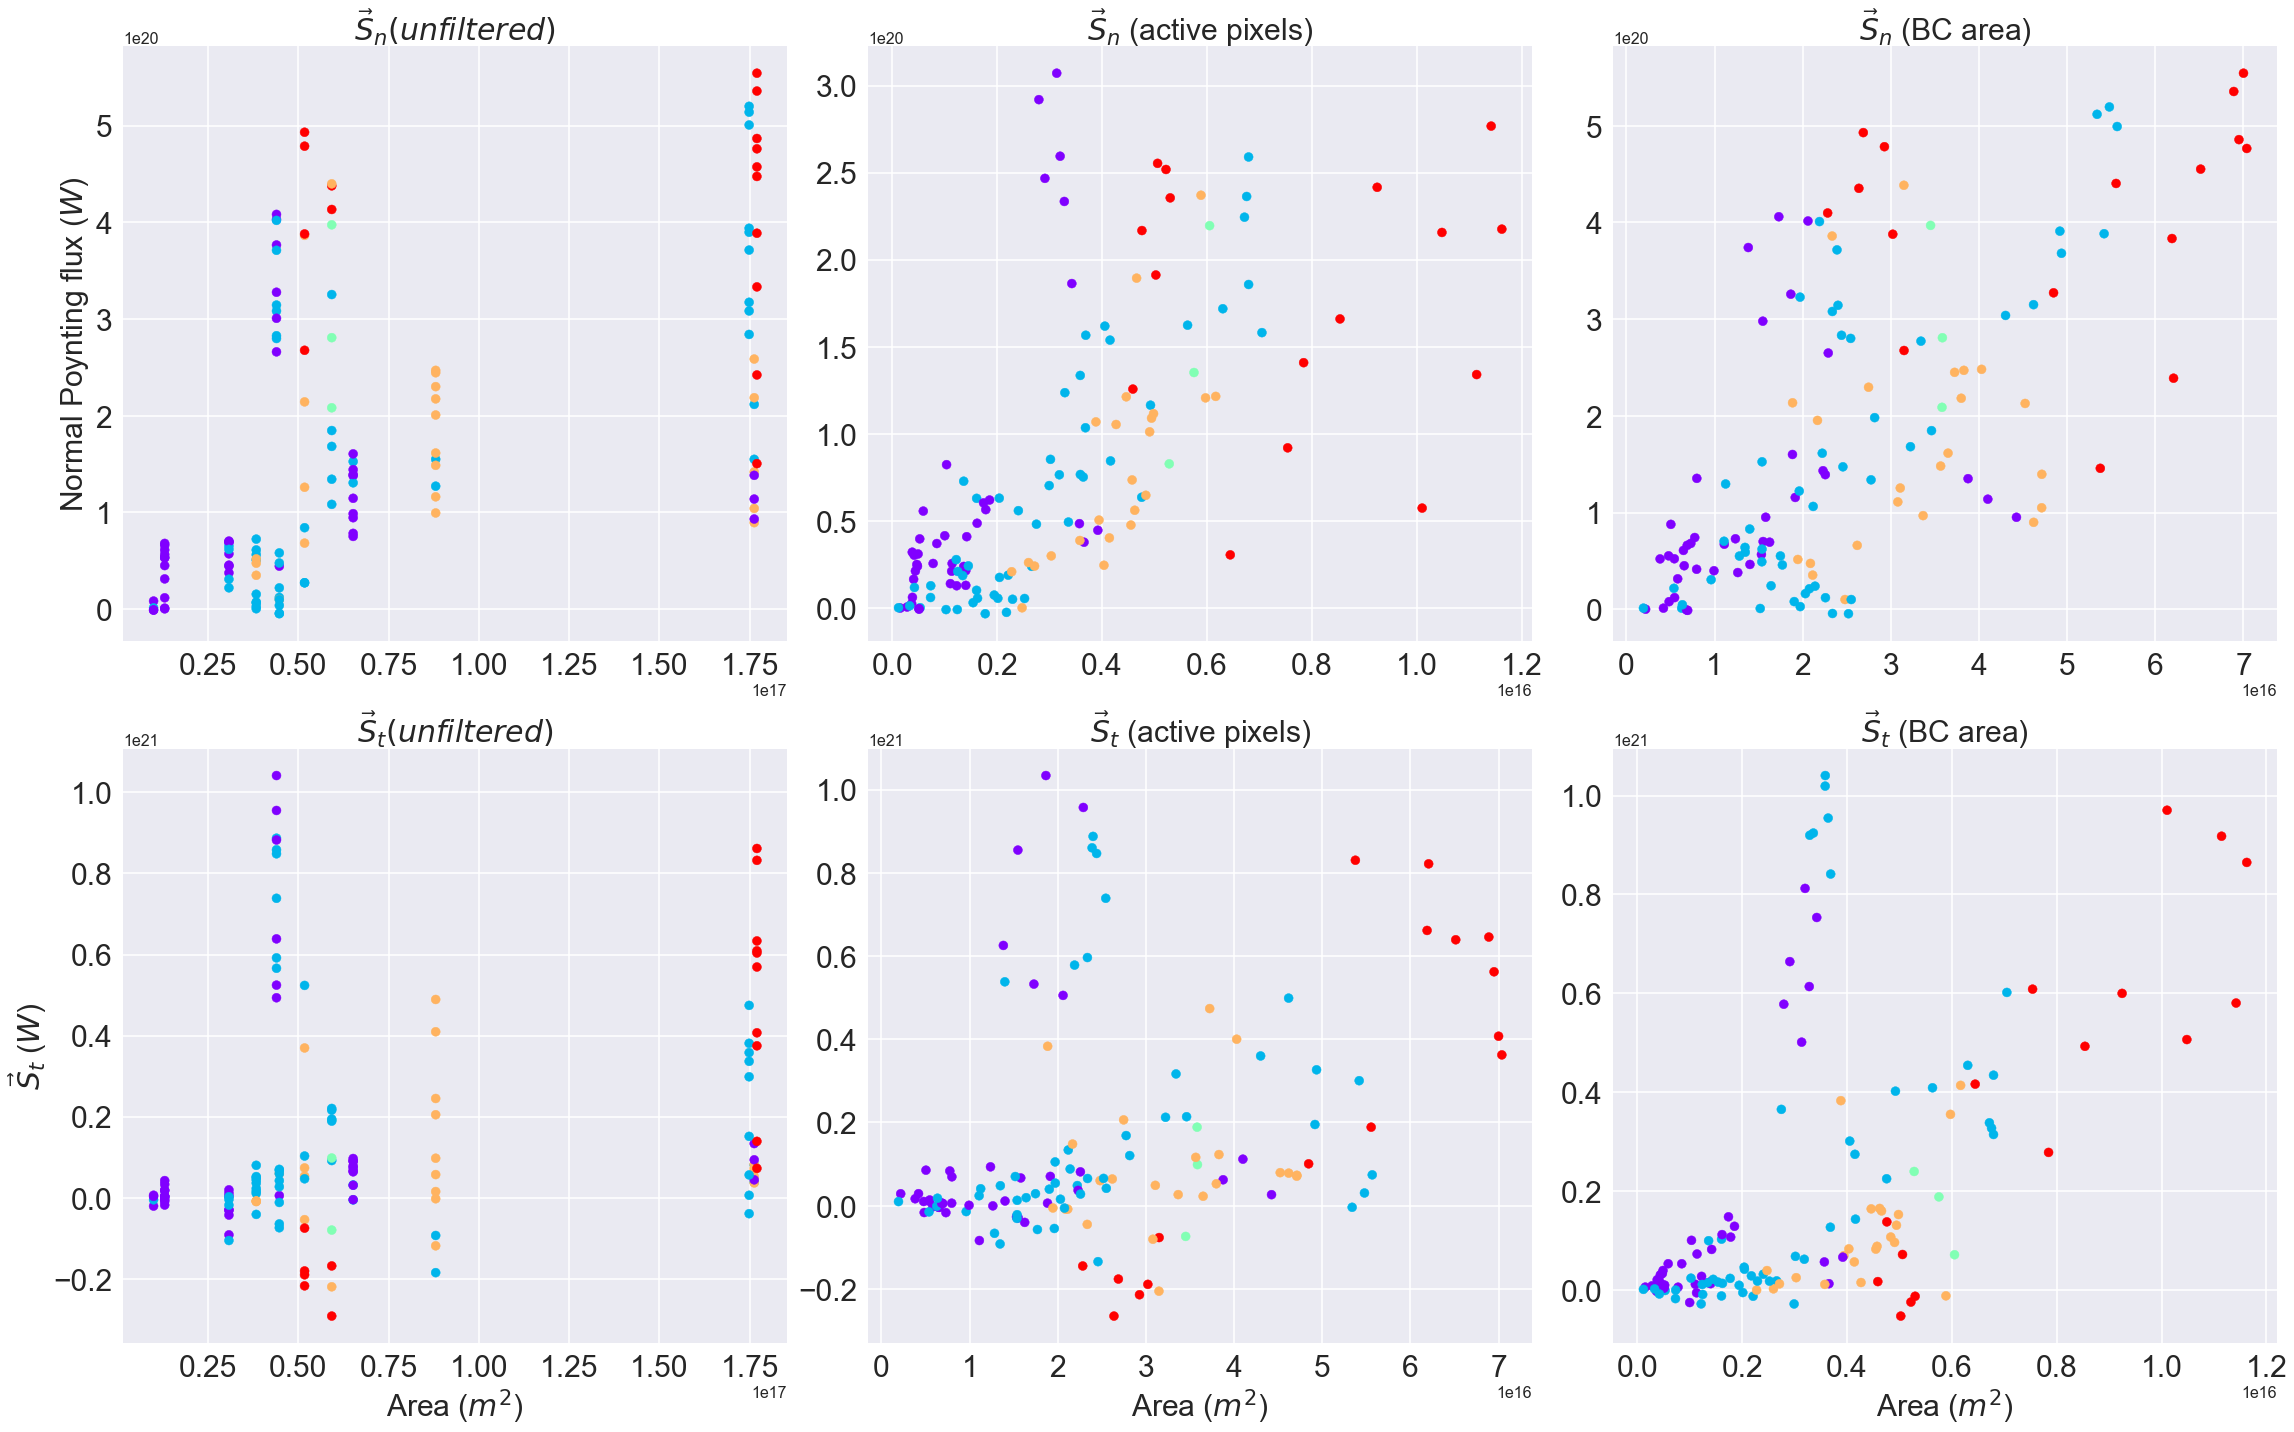

In [19]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(32,20))

fsize = 30

ax[0,0].scatter(df_pa['harp_area_si'], df_pa['Sn_unfiltered'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,0].set_ylabel('Normal Poynting flux ($W$)')
ax[0,0].set_title(r'$\vec{S}_{n} (unfiltered)$')
for item in ([ax[0,0].title, ax[0,0].xaxis.label, ax[0,0].yaxis.label] +
             ax[0,0].get_xticklabels() + ax[0,0].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[0,1].scatter(df_pa['Pix_a_a_si'], df_pa['Sn_active_and'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,1].set_title(r'$\vec{S}_{n}$ (active pixels)')
for item in ([ax[0,1].title, ax[0,1].xaxis.label, ax[0,1].yaxis.label] +
             ax[0,1].get_xticklabels() + ax[0,1].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[0,2].scatter(df_pa['Pix_b_a_si'], df_pa['Sn_blob_and'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,2].set_title(r'$\vec{S}_{n}$ (BC area)')
for item in ([ax[0,2].title, ax[0,2].xaxis.label, ax[0,2].yaxis.label] +
             ax[0,2].get_xticklabels() + ax[0,2].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,0].scatter(df_pa['harp_area_si'], df_pa['St_unfiltered'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,0].set_xlabel('Area ($m^{2}$)')
ax[1,0].set_ylabel(r'$\vec{S}_{t}$ ($W$)')
ax[1,0].set_title(r'$\vec{S}_{t} (unfiltered)$')
for item in ([ax[1,0].title, ax[1,0].xaxis.label, ax[1,0].yaxis.label] +
             ax[1,0].get_xticklabels() + ax[1,0].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,1].scatter(df_pa['Pix_b_a_si'], df_pa['St_blob_and'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,1].set_xlabel('Area ($m^{2}$)')
ax[1,1].set_title(r'$\vec{S}_{t}$ (active pixels)')
for item in ([ax[1,1].title, ax[1,1].xaxis.label, ax[1,1].yaxis.label] +
             ax[1,1].get_xticklabels() + ax[1,1].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,2].scatter(df_pa['Pix_a_a_si'], df_pa['St_active_and'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,2].set_xlabel('Area ($m^{2}$)')
ax[1,2].set_title(r'$\vec{S}_{t}$ (BC area)')
for item in ([ax[1,2].title, ax[1,2].xaxis.label, ax[1,2].yaxis.label] +
             ax[1,2].get_xticklabels() + ax[1,2].get_yticklabels()):
    item.set_fontsize(fsize)

plt.tight_layout()
plt.savefig('/Users/andrechicrala/Downloads/scatterpanel1.eps')
plt.show()

In [20]:
df_pa.columns

Index(['Pix_a_a', 'Pix_a_o', 'Pix_b_a', 'Pix_b_o', 'Sn_active_and',
       'Sn_active_or', 'Sn_blob_and', 'Sn_blob_or', 'Sn_unfiltered',
       'St_active_and', 'St_active_or', 'St_blob_and', 'St_blob_or',
       'St_unfiltered', 'Pix_a_a_si', 'Pix_a_o_si', 'Pix_b_a_si', 'Pix_b_o_si',
       'Sn_active_and_pa', 'Sn_active_or_pa', 'Sn_blob_and_pa',
       'Sn_blob_or_pa', 'St_active_and_pa', 'St_active_or_pa',
       'St_blob_and_pa', 'St_blob_or_pa', 'harp_area_si', 'LL', 'area', 'hale',
       'longitude', 'mcintosh1', 'mcintosh2', 'mcintosh3', 'hale_enc',
       'area_si', 'Sn_unfiltered_pa', 'St_unfiltered_pa'],
      dtype='object')

In [21]:
# Creating new columns with the quatities divided per area.
df_pa['Sn_unfiltered_pa']=df_pa['Sn_unfiltered']/df_pa['harp_area_si']
df_pa['St_unfiltered_pa']=df_pa['St_unfiltered']/df_pa['harp_area_si']

df_pa['Sn_blob_or_pa']=df_pa['Sn_blob_or']/df_pa['Pix_b_o_si']
df_pa['Sn_blob_and_pa']=df_pa['Sn_blob_and']/df_pa['Pix_b_a_si']
df_pa['Sn_active_or_pa']=df_pa['Sn_active_or']/df_pa['Pix_a_o_si']
df_pa['Sn_active_and_pa']=df_pa['Sn_active_and']/df_pa['Pix_a_a_si']

df_pa['St_blob_or_pa']=df_pa['St_blob_or']/df_pa['Pix_b_o_si']
df_pa['St_blob_and_pa']=df_pa['St_blob_and']/df_pa['Pix_b_a_si']
df_pa['St_active_or_pa']=df_pa['St_active_or']/df_pa['Pix_a_o_si']
df_pa['St_active_and_pa']=df_pa['St_active_and']/df_pa['Pix_a_a_si']

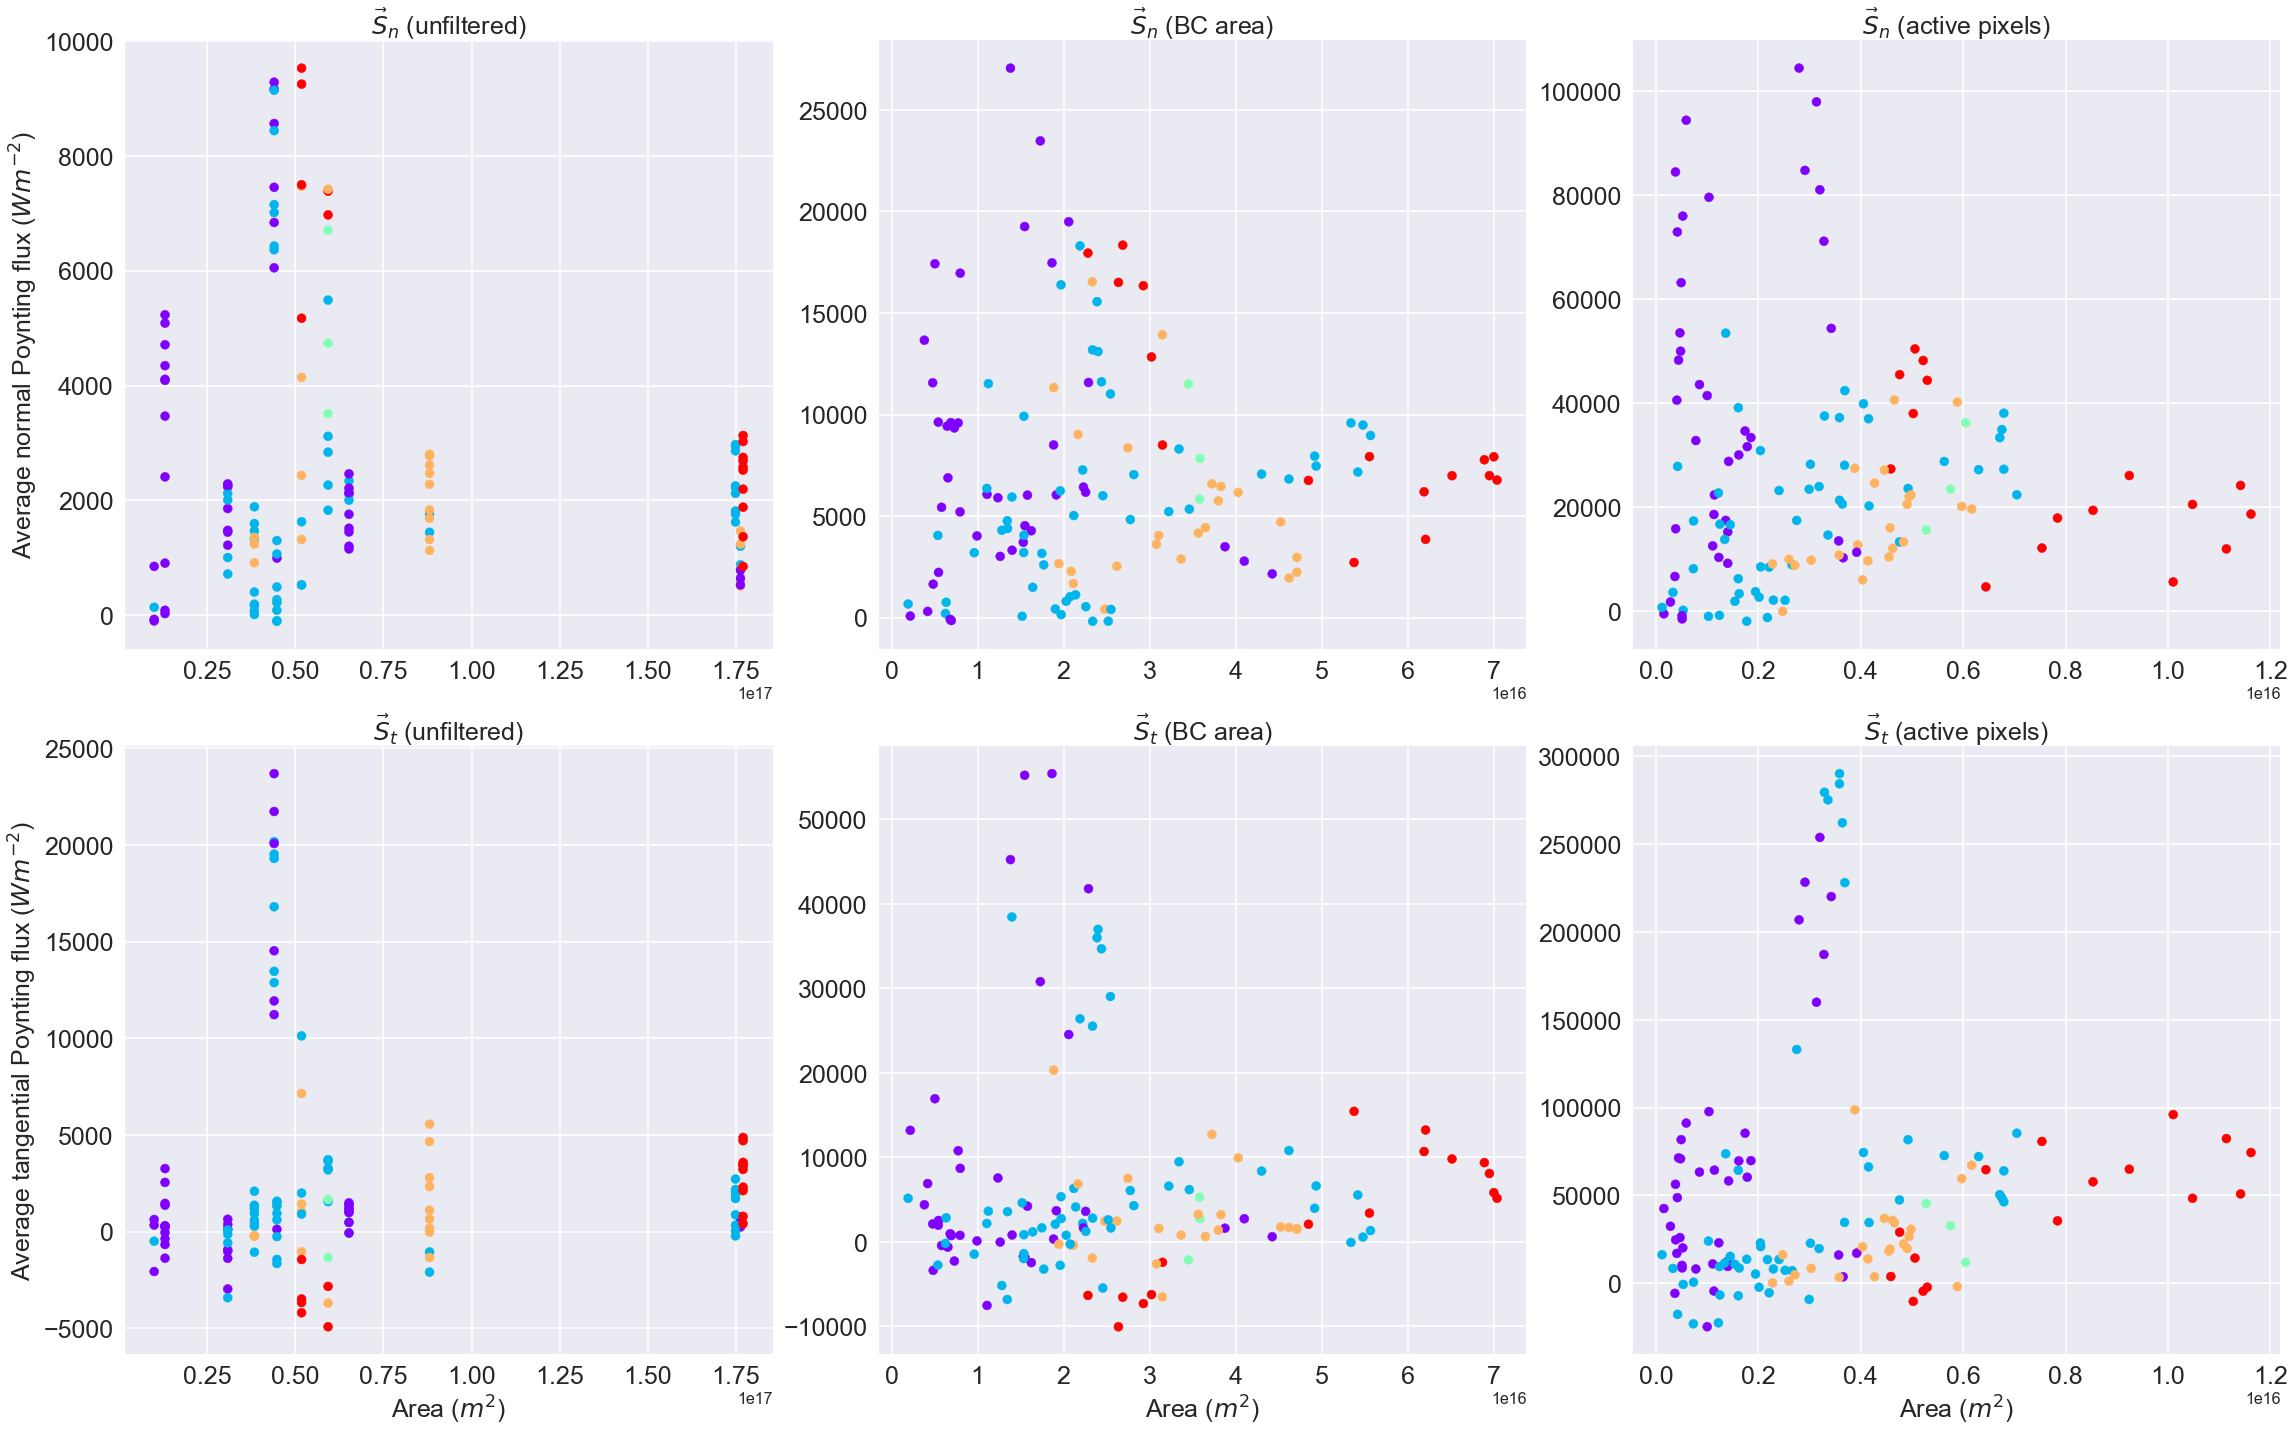

In [22]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(32,20))

fsize = 25

ax[0,0].scatter(df_pa['harp_area_si'], df_pa['Sn_unfiltered_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,0].set_ylabel(r'Average normal Poynting flux ($Wm^{-2}$)')
ax[0,0].set_title(r'$\vec{S}_{n}$ (unfiltered)')
for item in ([ax[0,0].title, ax[0,0].xaxis.label, ax[0,0].yaxis.label] +
             ax[0,0].get_xticklabels() + ax[0,0].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[0,1].scatter(df_pa['Pix_b_a_si'], df_pa['Sn_blob_and_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,1].set_title(r'$\vec{S}_{n}$ (BC area)')
for item in ([ax[0,1].title, ax[0,1].xaxis.label, ax[0,1].yaxis.label] +
             ax[0,1].get_xticklabels() + ax[0,1].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[0,2].scatter(df_pa['Pix_a_a_si'], df_pa['Sn_active_and_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[0,2].set_title(r'$\vec{S}_{n}$ (active pixels)')
for item in ([ax[0,2].title, ax[0,2].xaxis.label, ax[0,2].yaxis.label] +
             ax[0,2].get_xticklabels() + ax[0,2].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,0].scatter(df_pa['harp_area_si'], df_pa['St_unfiltered_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,0].set_xlabel('Area ($m^{2}$)')
ax[1,0].set_ylabel(r'Average tangential Poynting flux ($Wm^{-2}$)')
ax[1,0].set_title(r'$\vec{S}_{t}$ (unfiltered)')
for item in ([ax[1,0].title, ax[1,0].xaxis.label, ax[1,0].yaxis.label] +
             ax[1,0].get_xticklabels() + ax[1,0].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,1].scatter(df_pa['Pix_b_a_si'], df_pa['St_blob_and_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,1].set_xlabel('Area ($m^{2}$)')
ax[1,1].set_title(r'$\vec{S}_{t}$ (BC area)')
for item in ([ax[1,1].title, ax[1,1].xaxis.label, ax[1,1].yaxis.label] +
             ax[1,1].get_xticklabels() + ax[1,1].get_yticklabels()):
    item.set_fontsize(fsize)
    
ax[1,2].scatter(df_pa['Pix_a_a_si'], df_pa['St_active_and_pa'], c=cmaped, s=80, cmap=cmap, vmin=vmin, vmax=vmax)
ax[1,2].set_xlabel('Area ($m^{2}$)')
ax[1,2].set_title(r'$\vec{S}_{t}$ (active pixels)')
for item in ([ax[1,2].title, ax[1,2].xaxis.label, ax[1,2].yaxis.label] +
             ax[1,2].get_xticklabels() + ax[1,2].get_yticklabels()):
    item.set_fontsize(fsize)

plt.tight_layout()
plt.savefig('/Users/andrechicrala/Downloads/scatterpanel2.eps')

plt.show()